# Amazon reviews : Sentiment analysis

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Data-Analysis" data-toc-modified-id="Data-Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Top-10-most-reviewed-products" data-toc-modified-id="Top-10-most-reviewed-products-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Top 10 most reviewed products</a></span></li><li><span><a href="#Top-10-best-brand" data-toc-modified-id="Top-10-best-brand-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Top 10 best brand</a></span></li><li><span><a href="#Top-10-worst-products" data-toc-modified-id="Top-10-worst-products-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Top 10 worst products</a></span></li><li><span><a href="#Best-budget-product" data-toc-modified-id="Best-budget-product-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Best budget product</a></span></li><li><span><a href="#Best-high-end-product" data-toc-modified-id="Best-high-end-product-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Best high end product</a></span></li><li><span><a href="#Price-vs-Rating-distribution" data-toc-modified-id="Price-vs-Rating-distribution-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Price vs Rating distribution</a></span></li></ul></li><li><span><a href="#Model" data-toc-modified-id="Model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Model</a></span><ul class="toc-item"><li><span><a href="#Feature-extraction-from-text" data-toc-modified-id="Feature-extraction-from-text-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Feature extraction from text</a></span><ul class="toc-item"><li><span><a href="#Tfidf" data-toc-modified-id="Tfidf-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Tfidf</a></span></li></ul></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#n-grams" data-toc-modified-id="n-grams-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>n-grams</a></span></li></ul></li></ul></div>

## Introduction
About this Dataset
Context

PromptCloud extracted 400 thousand reviews of unlocked mobile phones sold on Amazon.com to find out insights with respect to reviews, ratings, price and their relationships.
Content

Given below are the fields:

    Product Title
    Brand
    Price
    Rating
    Review text
    Number of people who found the review helpful

Data was acquired in December, 2016 by the crawlers build to deliver our data extraction services.
Initial Analysis

It can be accessed here: http://www.kdnuggets.com/2017/01/data-mining-amazon-mobile-phone-reviews-interesting-insights.html

The goal of this notebook is to predict wheter a review is positive or negative using Logistic Regression, MLP and NN

**Data preparation**

First read the dataset in panda dataframe. We are interseted in positive and negative reviews only. No such column exist in dataframe.

To create the column we will remove neutral rating i.e. 3. After that values those are below 3 will be treated negative review and above 3 will be treated as positive review.

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

plt.style.use('fivethirtyeight')

# Read in the data
df = pd.read_csv('../input/amazon-reviews-unlocked-mobile-phones/Amazon_Unlocked_Mobile.csv')
df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


## Data Analysis

### Top 10 most reviewed products

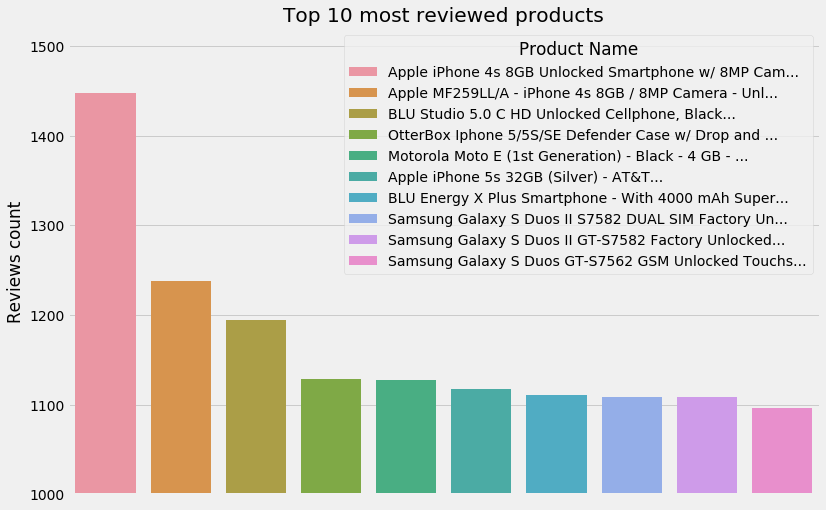

In [17]:

mostreviewd = (df.set_index('Product Name').groupby(level=0)['Reviews']
    .agg(['count'])).sort_values(['count'], ascending=False)[:10]



plt.figure(figsize=(12, 8))
sns.barplot(mostreviewd.reset_index().index, y=mostreviewd['count'], hue=mostreviewd.index.str[:50] + '...', dodge=False)
plt.ylim(1000,)
plt.xticks([]);
plt.ylabel('Reviews count')
plt.title('Top 10 most reviewed products');

### Top 10 best brand

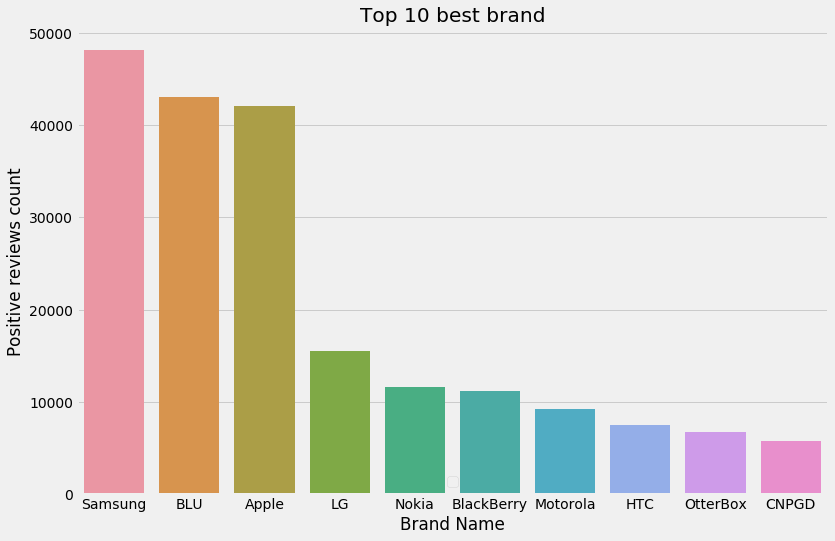

In [18]:
bestbrand = (df[df['Rating'] > 3].set_index('Brand Name').groupby(level=0)['Reviews'].
    agg(['count'])).sort_values(['count'], ascending=False)[:10]

plt.figure(figsize=(12, 8))
sns.barplot(bestbrand.index, y=bestbrand['count'], hue=bestbrand.index, dodge=False)
plt.legend([])
plt.ylabel('Positive reviews count')
plt.title('Top 10 best brand');

### Top 10 worst products

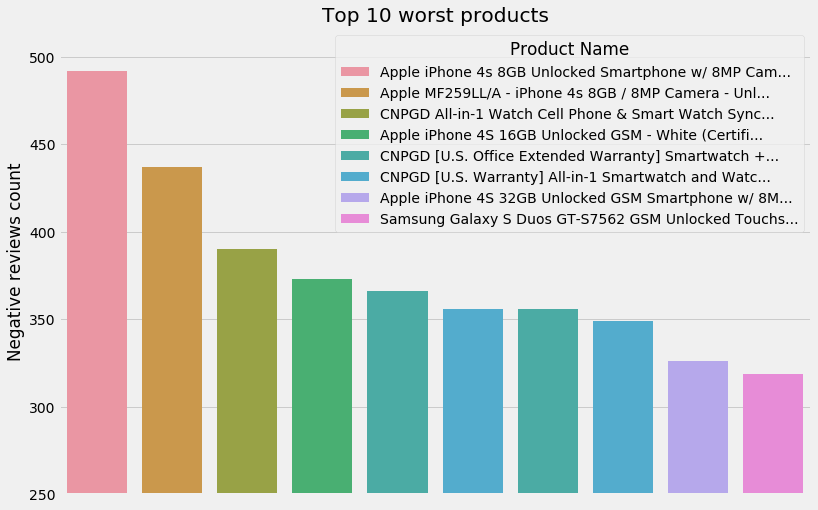

In [19]:
# Filter out rating above 3 and get the review count
worstproduct = (df[df['Rating'] < 3].set_index('Product Name').groupby(level=0)['Reviews'].
    agg(['count'])).sort_values(['count'], ascending=False)[:10]

plt.figure(figsize=(12, 8))
sns.barplot(worstproduct.reset_index().index, y=worstproduct['count'], hue=worstproduct.index.str[:50] + '...', dodge=False)
plt.ylim(250,)
plt.xticks([]);
plt.ylabel('Negative reviews count')
plt.title('Top 10 worst products');

### Best budget product

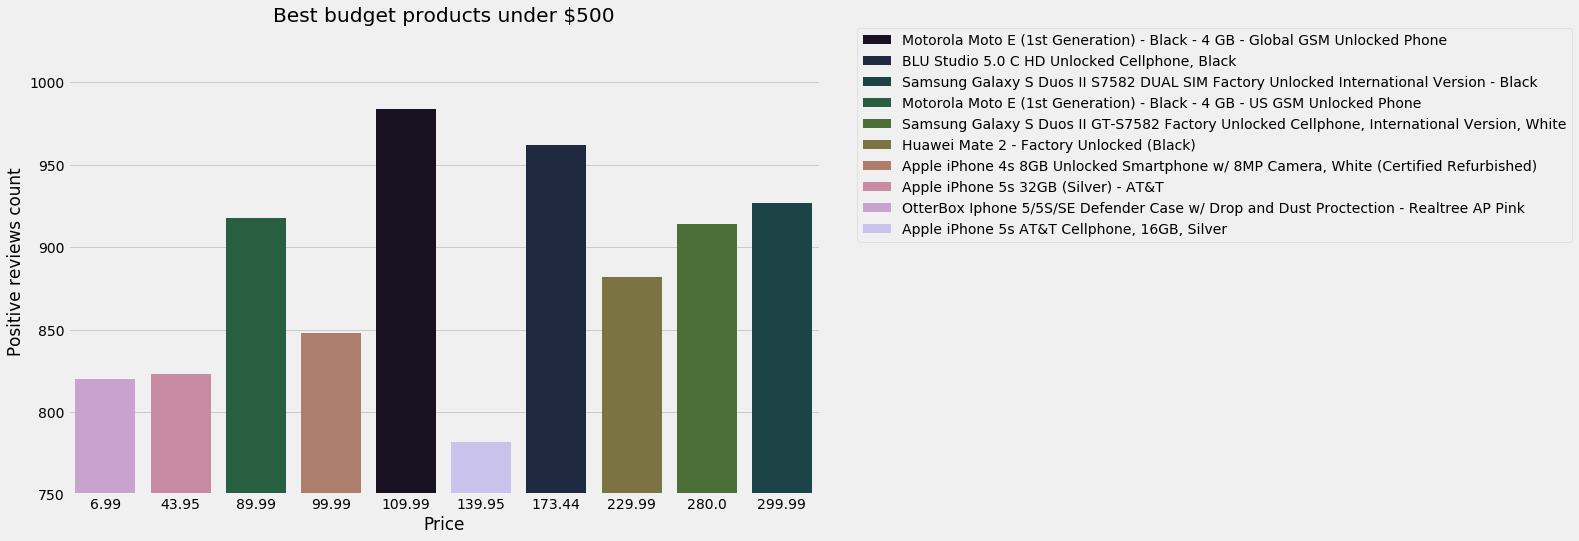

In [20]:
## Best budget product
budget = (df[(df['Rating'] > 3) & (df['Price'] < 500)].set_index('Product Name').groupby(level=0)['Price'].
    agg(['count'])).sort_values(['count'], ascending=False)[:10]

grouped = df.set_index('Product Name').loc[budget.index].groupby(level=0)

price = pd.Series(index = budget.index)
for name, group in grouped:
    price.loc[name] = group.Price.iloc[0] 
    
budget['Price'] = price
budget.reset_index(inplace=True)

plt.figure(figsize=(12, 8))
sns.barplot(x='Price', y='count', dodge=False, hue='Product Name', data=budget, palette=sns.color_palette("cubehelix", 12))
plt.ylim(750,)
plt.ylabel('Positive reviews count')
plt.title('Best budget products under $500');
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

### Best high end product

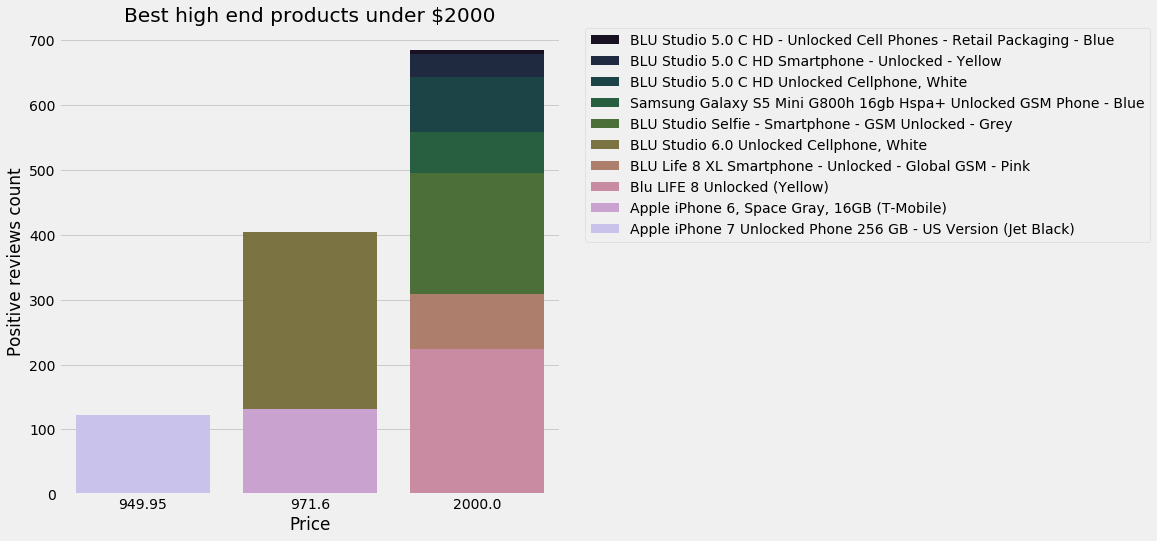

In [21]:
highend = (df[(df['Rating'] > 3) & (df['Price'] > 900)].set_index('Product Name').groupby(level=0)['Price'].
    agg(['count'])).sort_values(['count'], ascending=False)[:10]

grouped = df.set_index('Product Name').loc[highend.index].groupby(level=0)

price = pd.Series(index = budget.index)
for name, group in grouped:
    price.loc[name] = group.Price.iloc[0] 
    
highend['Price'] = price
highend.reset_index(inplace=True)

plt.figure(figsize=(8, 8))
sns.barplot(x='Price', y='count', dodge=False, hue='Product Name', data=highend, palette=sns.color_palette("cubehelix", 12))
plt.ylabel('Positive reviews count')
plt.title('Best high end products under $2000');
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

### Price vs Rating distribution

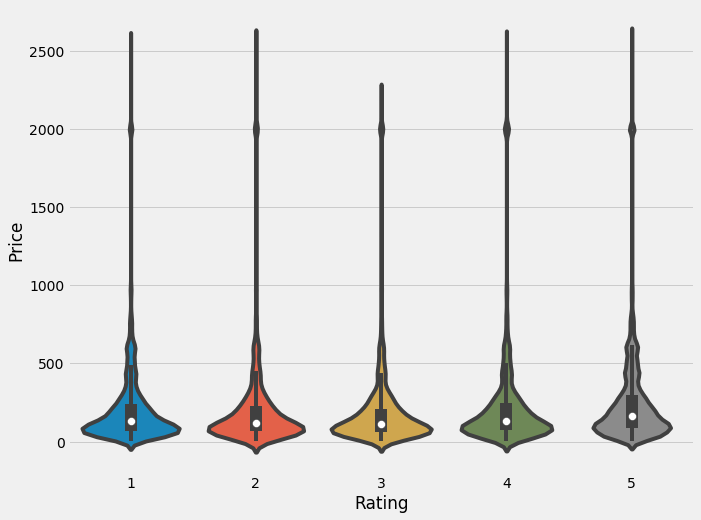

In [22]:
plt.figure(figsize=(10,8))
sns.violinplot(x="Rating", y="Price", data=df)
plt.title('Price vs Rating distribution');

## Model

In [23]:
# Drop missing values
df.dropna(inplace=True)

# Remove any 'neutral' ratings equal to 3
df = df[df['Rating'] != 3]

# Encode 4s and 5s as 1 (rated positively)
# Encode 1s and 2s as 0 (rated poorly)
df['Positively Rated'] = np.where(df['Rating'] > 3, 1, 0)
df.head(10)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Positively Rated
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,1
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,1
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,1
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,1
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,1
5,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,1,I already had a phone with problems... I know ...,1.0,0
6,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,2,The charging port was loose. I got that solder...,0.0,0
7,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,2,"Phone looks good but wouldn't stay charged, ha...",0.0,0
8,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I originally was using the Samsung S2 Galaxy f...,0.0,1
11,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,This is a great product it came after two days...,0.0,1


In [24]:
df.describe()

,Price,Rating,Review Votes,Positively Rated
count,308277.000000,308277.000000,308277.000000,308277.000000
mean,226.059362,3.894614,1.490072,0.748269
std,285.064731,1.585468,9.252592,0.434008
min,1.730000,1.000000,0.000000,0.000000
25%,77.990000,2.000000,0.000000,0.000000
50%,139.040000,5.000000,0.000000,1.000000
75%,269.100000,5.000000,1.000000,1.000000
max,2598.000000,5.000000,645.000000,1.000000


As you can see most of the reviews are positive.

In [25]:
# Get training and test data from dataset. 
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['Reviews'], 
                                                    df['Positively Rated'], 
                                                    random_state=0)

### Feature extraction from text
The main and only feature for this model is **Review**. We will be parsing review and train the model. Finally, model should be able to predict whether review is positive or negative.

* Feature : Reviews
* Target : Positively Rated

#### Tfidf

Convert a collection of raw documents to a matrix of TF-IDF features. https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html



In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Fit the TfidfVectorizer to the training data specifiying a minimum document frequency of 5
vect = TfidfVectorizer(min_df=5).fit(X_train)
len(vect.get_feature_names())

17951

TfidfVectorizer created 17951 features from review text. Now we can feed this features to out model. Lets see top features extracted by TfidfVectorizer

In [27]:
X_train_vectorized = vect.transform(X_train)

In [28]:
feature_names = np.array(vect.get_feature_names())

sorted_tfidf_index = X_train_vectorized.max(0).toarray()[0].argsort()

print('Smallest tfidf:\n{}\n'.format(feature_names[sorted_tfidf_index[:10]]))
print('Largest tfidf: \n{}'.format(feature_names[sorted_tfidf_index[:-11:-1]]))

Smallest tfidf:
['commenter' 'pthalo' 'warmness' 'storageso' 'aggregration' '1300'
 '625nits' 'a10' 'submarket' 'brawns']

Largest tfidf: 
['defective' 'batteries' 'gooood' 'epic' 'luis' 'goood' 'basico'
 'aceptable' 'problems' 'excellant']


### Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

X_train_vectorized = vect.transform(X_train)

model = LogisticRegression(solver='saga')
model.fit(X_train_vectorized, y_train)

predictions = model.predict(vect.transform(X_test))

print('AUC: ', roc_auc_score(y_test, model.decision_function(vect.transform(X_test))))


AUC:  0.9821685145842519


Our model's roc score is very good. Below are the lists of words from Logistic Regression model coefficiants 

In [30]:
sorted_coef_index = model.coef_[0].argsort()

print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['not' 'worst' 'useless' 'disappointed' 'terrible' 'return' 'waste' 'poor'
 'horrible' 'doesn']

Largest Coefs: 
['love' 'great' 'excellent' 'perfect' 'amazing' 'awesome' 'perfectly'
 'easy' 'best' 'loves']


In [31]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def PlotWordCloud(words, title):
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white' 
                ).generate(words) 
                                                           
    # plot the WordCloud image                        
    plt.figure(figsize = (10, 10), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title, fontsize=50)

    plt.show() 

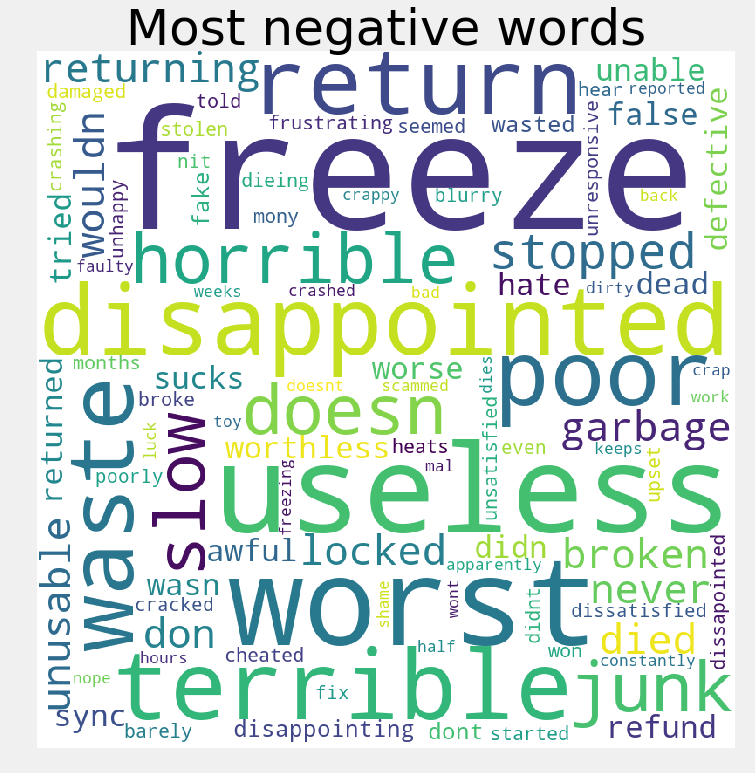

In [32]:
negative = ''
for word in feature_names[sorted_coef_index[:100]]:
    negative += word + ' '
PlotWordCloud(negative, 'Most negative words')

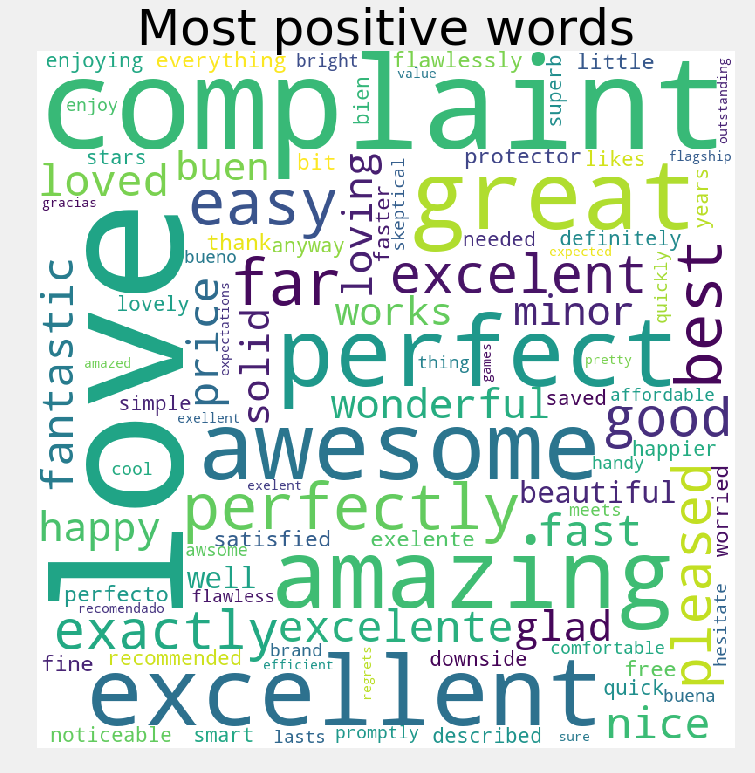

In [33]:
positive = ''
for word in feature_names[sorted_coef_index[:-101:-1]]:
    positive += word + ' '    
PlotWordCloud(positive, 'Most positive words')

Model is wroking as expected. Lets try to give it some difficult reviews

In [34]:
print(model.predict(vect.transform(['not an issue, phone is working',
                                    'an issue, phone is not working'])))

[0 0]


If you can notice that our model is predicting both the reviews as negative. It is only considering single word. Now lets make it understand two word combination.

### n-grams

In [35]:
# extracting 1-grams and 2-grams
vect = TfidfVectorizer(min_df=5, ngram_range=(1,2)).fit(X_train)

X_train_vectorized = vect.transform(X_train)

len(vect.get_feature_names())

198917

The features count reached to whopping 198917 from 17951. Lets train the model again with new features

In [36]:
model = LogisticRegression(solver='saga')
model.fit(X_train_vectorized, y_train)

predictions = model.predict(vect.transform(X_test))

print('AUC: ', roc_auc_score(y_test, model.decision_function(vect.transform(X_test))))

AUC:  0.9894893494207719


In [37]:
feature_names = np.array(vect.get_feature_names())

sorted_coef_index = model.coef_[0].argsort()

print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['not' 'disappointed' 'worst' 'poor' 'terrible' 'return' 'horrible'
 'doesn' 'not happy' 'slow']

Largest Coefs: 
['great' 'love' 'excellent' 'perfect' 'amazing' 'not bad' 'best'
 'no problems' 'awesome' 'perfectly']


In [38]:
print(model.predict(vect.transform(['not an issue, phone is working',
                                    'an issue, phone is not working'])))

[1 0]


Thats exactly we want our model should predict. It is now able to diffrentiate reviews based on tow words combination.